<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reshaping-Data-(well,-DataFrames)" data-toc-modified-id="Reshaping-Data-(well,-DataFrames)-1">Reshaping Data (well, DataFrames)</a></span><ul class="toc-item"><li><span><a href="#Changing-Row-Indices" data-toc-modified-id="Changing-Row-Indices-1.1">Changing Row Indices</a></span></li><li><span><a href="#Hierarchical-Indices:-A-Very-Brief-Look" data-toc-modified-id="Hierarchical-Indices:-A-Very-Brief-Look-1.2">Hierarchical Indices: A Very Brief Look</a></span></li><li><span><a href="#Long-and-Wide-Data-Formats" data-toc-modified-id="Long-and-Wide-Data-Formats-1.3">Long and Wide Data Formats</a></span></li></ul></li></ul></div>

# Reshaping Data (well, DataFrames)

Firstly, the usual preamble for importing the essential modules and configuring the plotting engine.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
sns.set(
    rc={ "figure.figsize": (8,6) },
    style="ticks", context="notebook", font_scale=1.2
)

We will make use of the familiar `gapminder` for some of examples and exercises.

In [34]:
dataset_location = 'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gapminder.tsv'
gm_df = pd.read_csv(
    dataset_location,
    sep='\t'
)

A quick reminder of structure and contents of the dataset:

In [35]:
gm_df.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap
856,Kuwait,Asia,1972,67.712,841934,109347.867000
1022,Morocco,Africa,1962,47.924,13056604,1566.353493
566,Germany,Europe,1962,70.300,73739117,12902.462910
1343,Serbia,Europe,2007,74.002,10150265,9786.534714
768,Italy,Europe,1952,65.940,47666000,4931.404155


## Changing Row Indices

We have discussed in more than one occasion that DataFrames are indexed by **row** and **column** indices. By default, `pandas` created a range of integers for the **row labels**:

In [36]:
gm_df.index

RangeIndex(start=0, stop=1704, step=1)

And the **column labels** match the header of the `.csv` file:

In [37]:
gm_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

To address one or more rows, one would normally use `.loc` with the corresponding labels:

In [38]:
gm_df.loc[249]

country           Canada
continent       Americas
year                1997
lifeExp            78.61
pop             30305843
gdpPercap    28954.92589
Name: 249, dtype: object

In many scenarios, one might want to make a row index more meaningful, into something that corresponds to intrinsic properties of the data. For example, if you we were looking a student dataset, we could use student IDs or (albeit, not as good) full names. More often than not, row labels are useful when they stand as unique identifiers for observations.

We can use `.set_index()` and `.reset_index()` for turning a column into a row index, and vice-versa. Let us illustrate with a subset of `gapminder`.

In [39]:
australia_df = gm_df.loc[ gm_df['country']=='Australia' ]

In [40]:
australia_df

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.120,8691212,10039.59564
61,Australia,Oceania,1957,70.330,9712569,10949.64959
62,Australia,Oceania,1962,70.930,10794968,12217.22686
63,Australia,Oceania,1967,71.100,11872264,14526.12465
64,Australia,Oceania,1972,71.930,13177000,16788.62948
65,Australia,Oceania,1977,73.490,14074100,18334.19751
66,Australia,Oceania,1982,74.740,15184200,19477.00928
67,Australia,Oceania,1987,76.320,16257249,21888.88903
68,Australia,Oceania,1992,77.560,17481977,23424.76683
69,Australia,Oceania,1997,78.830,18565243,26997.93657


I will take a subset of columns for making the demonstration easier. Instead of `.loc` for selecting the columns of interest, I am **droping** those I do not wish to keep.

In [41]:
australia_df = australia_df.drop(
    columns=['country','continent', 'gdpPercap', 'pop']
)

In [42]:
australia_df

,year,lifeExp
60,1952,69.120
61,1957,70.330
62,1962,70.930
63,1967,71.100
64,1972,71.930
65,1977,73.490
66,1982,74.740
67,1987,76.320
68,1992,77.560
69,1997,78.830


In [43]:
australia_df = australia_df.set_index('year')

In [44]:
australia_df

,lifeExp
year,
1952,69.120
1957,70.330
1962,70.930
1967,71.100
1972,71.930
1977,73.490
1982,74.740
1987,76.320
1992,77.560


In [45]:
australia_df.index

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

In [46]:
australia_df.loc[2002]

lifeExp    80.37
Name: 2002, dtype: float64

In [47]:
australia_df.loc[1992:2007]

,lifeExp
year,
1992,77.560
1997,78.830
2002,80.370
2007,81.235


**checkpoint**:

Take a subset of `gapminder` for `Americas` and `1952`; it makes sense to assign it to a variable (with a meaningful name). Then, make `country` the row index, and try some indexing expressions with `.loc` for selecting unique observations from that subset.

## Hierarchical Indices: A Very Brief Look

More than one column can be pushed into the row index; then, the latter becomes a **hierarchical index**. Each column occupies an index **level**. There are all sorts of complex operations and transformation that we can apply on and with them; for now, we are only looking at reshaping operations such as `set_index` and `reset_index`. 

Further information can be found in the the [`pandas` online documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index), as well as in the **Python Data Science Handbook**.

For illustration, we will take again a subset of `gapminder` - this time, only for countries in `Oceania`.

In [48]:
oceania_df = gm_df.loc[ gm_df['continent']=='Oceania' ]
oceania_df = oceania_df.drop(
    columns=['continent', 'gdpPercap', 'pop']
)
oceania_df.sample(2)

,country,year,lifeExp
61,Australia,1957,70.33
70,Australia,2002,80.37


Wouldn't it be more convenient to address a specific row given a country name and year?

In [49]:
oceania_df = oceania_df.set_index(['country', 'year'])
oceania_df

lifeExp
country     year         
Australia   1952   69.120
            1957   70.330
            1962   70.930
            1967   71.100
            1972   71.930
            1977   73.490
            1982   74.740
            1987   76.320
            1992   77.560
            1997   78.830
            2002   80.370
            2007   81.235
New Zealand 1952   69.390
            1957   70.260
            1962   71.240
            1967   71.520
            1972   71.890
            1977   72.220
            1982   73.840
            1987   74.320
            1992   76.330
            1997   77.550
            2002   79.110
            2007   80.204

In [50]:
oceania_df.loc['Australia']

,lifeExp
year,
1952,69.120
1957,70.330
1962,70.930
1967,71.100
1972,71.930
1977,73.490
1982,74.740
1987,76.320
1992,77.560


In [51]:
oceania_df.loc[('Australia', 2007)]

lifeExp    81.235
Name: (Australia, 2007), dtype: float64

**checkpoint**:

In a similar fashion, obtain a subset for 2007 observations and use both `continent` and `country` as row index. Try a few `.loc` expressions using pairs of continent and country labels, as well as partial matching on a single `continent`.

## Long and Wide Data Formats

In short: typically, the columns of the dataset represent properties of the data but, in a number of situations (say, because of the way the data was recorded, or for making comparisons and plotting easier), values are shown are columns.

In [52]:
oceania_df.head()

lifeExp
country   year         
Australia 1952    69.12
          1957    70.33
          1962    70.93
          1967    71.10
          1972    71.93

I just want to produce a small dataset with values as column label. `.unstack()` transforms **a set of row labels into a set of columns labels** (the opposite is `.stack()`; further examples on the Python Data Science Handbook).

In [53]:
oceania_wide_df = oceania_df.unstack('year')['lifeExp']
oceania_wide_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,69.12,70.33,70.93,71.10,71.93,73.49,74.74,76.32,77.56,78.83,80.37,81.235
New Zealand,69.39,70.26,71.24,71.52,71.89,72.22,73.84,74.32,76.33,77.55,79.11,80.204


In [54]:
oceania_wide_df.loc[['Australia'], 1997:]

year,1997,2002,2007
country,,,
Australia,78.83,80.37,81.235


In [55]:
oceania_wide_df.index

Index(['Australia', 'New Zealand'], dtype='object', name='country')

In [56]:
oceania_wide_df.columns

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

In [57]:
oceania_wide_df.mean(axis='columns')

country
Australia      74.662917
New Zealand    73.989500
dtype: float64

In [58]:
gm_df.set_index(['country', 'year']).drop(columns='continent').unstack('year').head()

lifeExp                                                          \
year           1952    1957    1962    1967    1972    1977    1982    1987   
country                                                                       
Afghanistan  28.801  30.332  31.997  34.020  36.088  38.438  39.854  40.822   
Albania      55.230  59.280  64.820  66.220  67.690  68.930  70.420  72.000   
Algeria      43.077  45.685  48.303  51.407  54.518  58.014  61.368  65.799   
Angola       30.015  31.999  34.000  35.985  37.928  39.483  39.942  39.906   
Argentina    62.485  64.399  65.142  65.634  67.065  68.481  69.942  70.774   

                             ...    gdpPercap                            \
year           1992    1997  ...         1962         1967         1972   
country                      ...                                          
Afghanistan  41.674  41.763  ...   853.100710   836.197138   739.981106   
Albania      71.581  72.950  ...  2312.888958  2760.196931  3313.422188   
Algeria      67.744  69.152  ...  2550.816880  3246.991771  4182.663766   
Angola       40.647  40.963  ...  4269.276742  5522.776375  5473.288005   
Argentina    71.868  73.275  ...  7133.166023  8052.953021  9443.038526   

                                                                  \
year                 1977         1982         1987         1992   
country                                                            
Afghanistan    786.113360   978.011439   852.395945   649.341395   
Albania       3533.003910  3630.880722  3738.932735  2497.437901   
Algeria       4910.416756  5745.160213  5681.358539  5023.216647   
Angola        3008.647355  2756.953672  2430.208311  2627.845685   
Argentina    10079.026740  8997.897412  9139.671389  9308.418710   

                                                      
year                 1997         2002          2007  
country                                               
Afghanistan    635.341351   726.734055    974.580338  
Albania       3193.054604  4604.211737   5937.029526  
Algeria       4797.295051  5288.040382   6223.367465  
Angola        2277.140884  2773.287312   4797.231267  
Argentina    10967.281950  8797.640716  12779.379640  

[5 rows x 36 columns]

Recapping:

* `.set_index()` converts a column into a row index, and vice-versa. The values of a column are mapped into row labels. Its reverse is  `reset_index()`.

* `.unstack()` converts a row index into a set of columns. `.stack()` is its reverse.

Usefully, one can swaps rows with columns via a **transpose** operation:

In [59]:
oceania_wide_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,69.12,70.33,70.93,71.10,71.93,73.49,74.74,76.32,77.56,78.83,80.37,81.235
New Zealand,69.39,70.26,71.24,71.52,71.89,72.22,73.84,74.32,76.33,77.55,79.11,80.204


In [60]:
oceania_wide_df.T

country,Australia,New Zealand
year,,
1952,69.120,69.390
1957,70.330,70.260
1962,70.930,71.240
1967,71.100,71.520
1972,71.930,71.890
1977,73.490,72.220
1982,74.740,73.840
1987,76.320,74.320
1992,77.560,76.330


In [61]:
oceania_wide_df.T.index

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

In [62]:
oceania_wide_df.T.columns

Index(['Australia', 'New Zealand'], dtype='object', name='country')

## Some Useful Applications of Reshaping

A more complex expression (which could surely be broken down) shows how grouping and reshaping can give us some more interesting plots for groups comparisons and insights:

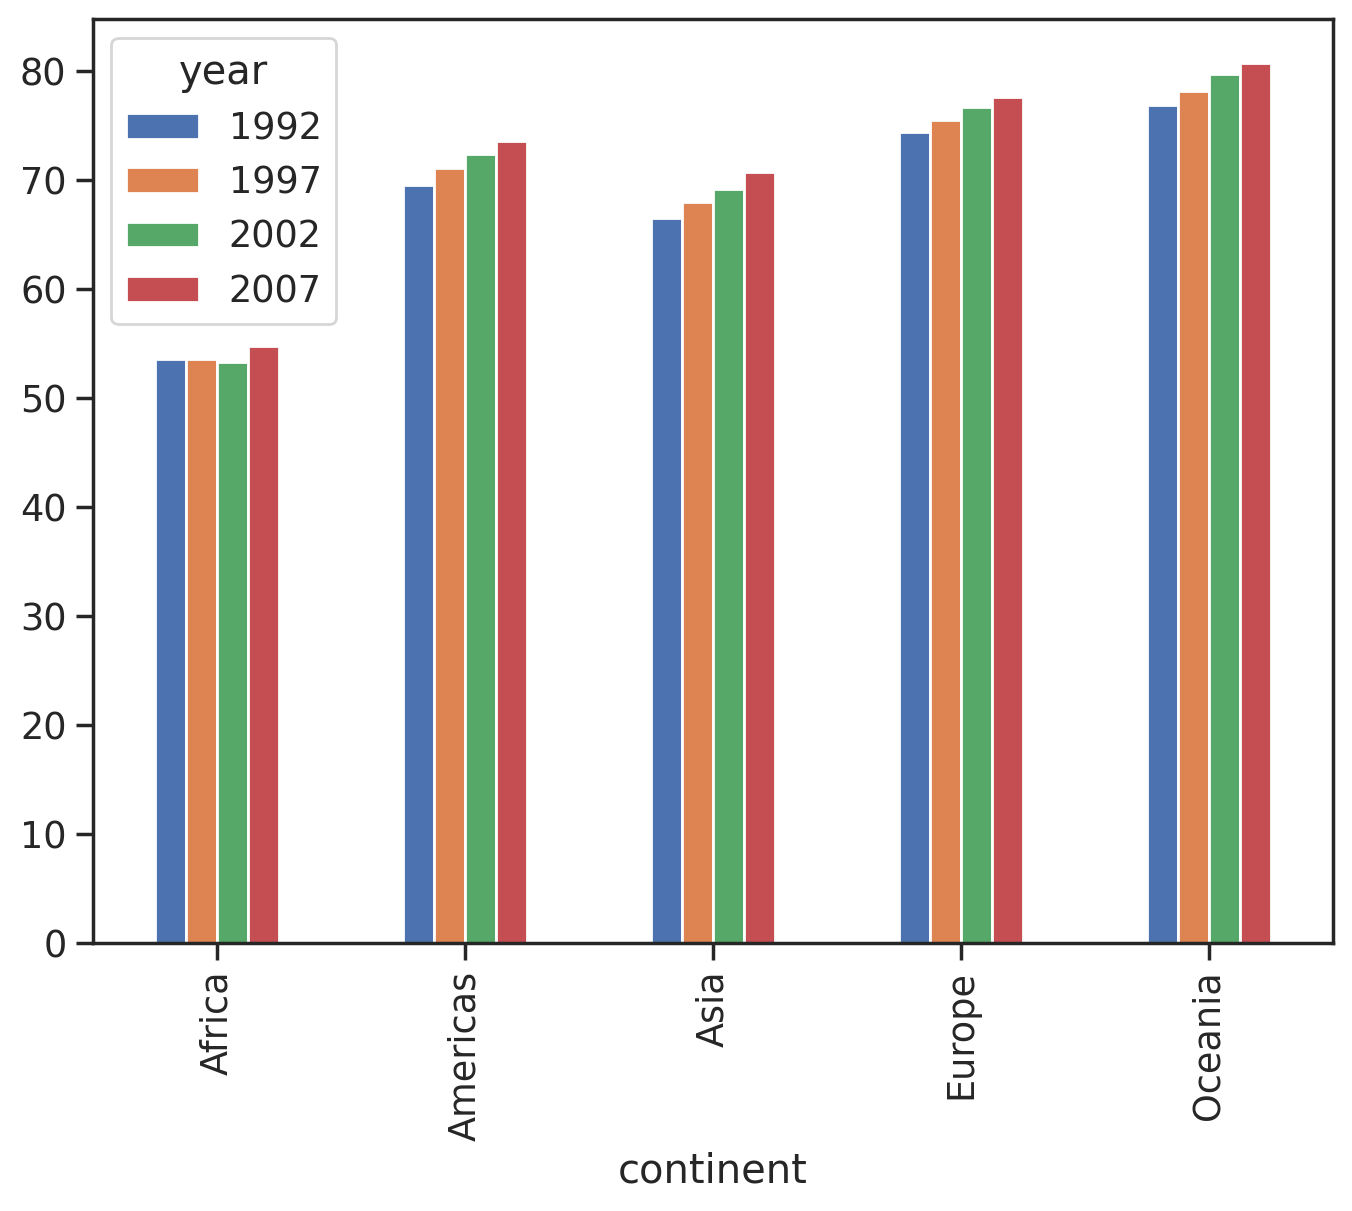

In [63]:
gm_df.groupby(['continent', 'year'])['lifeExp'].mean().unstack('year').loc[:, 1992:2007].plot.bar();

Aside - **breaking down long statements/pipelines** (the brackets are needed so that Python doesn't complain, for example, about all the whitespace between method calls and their objects):

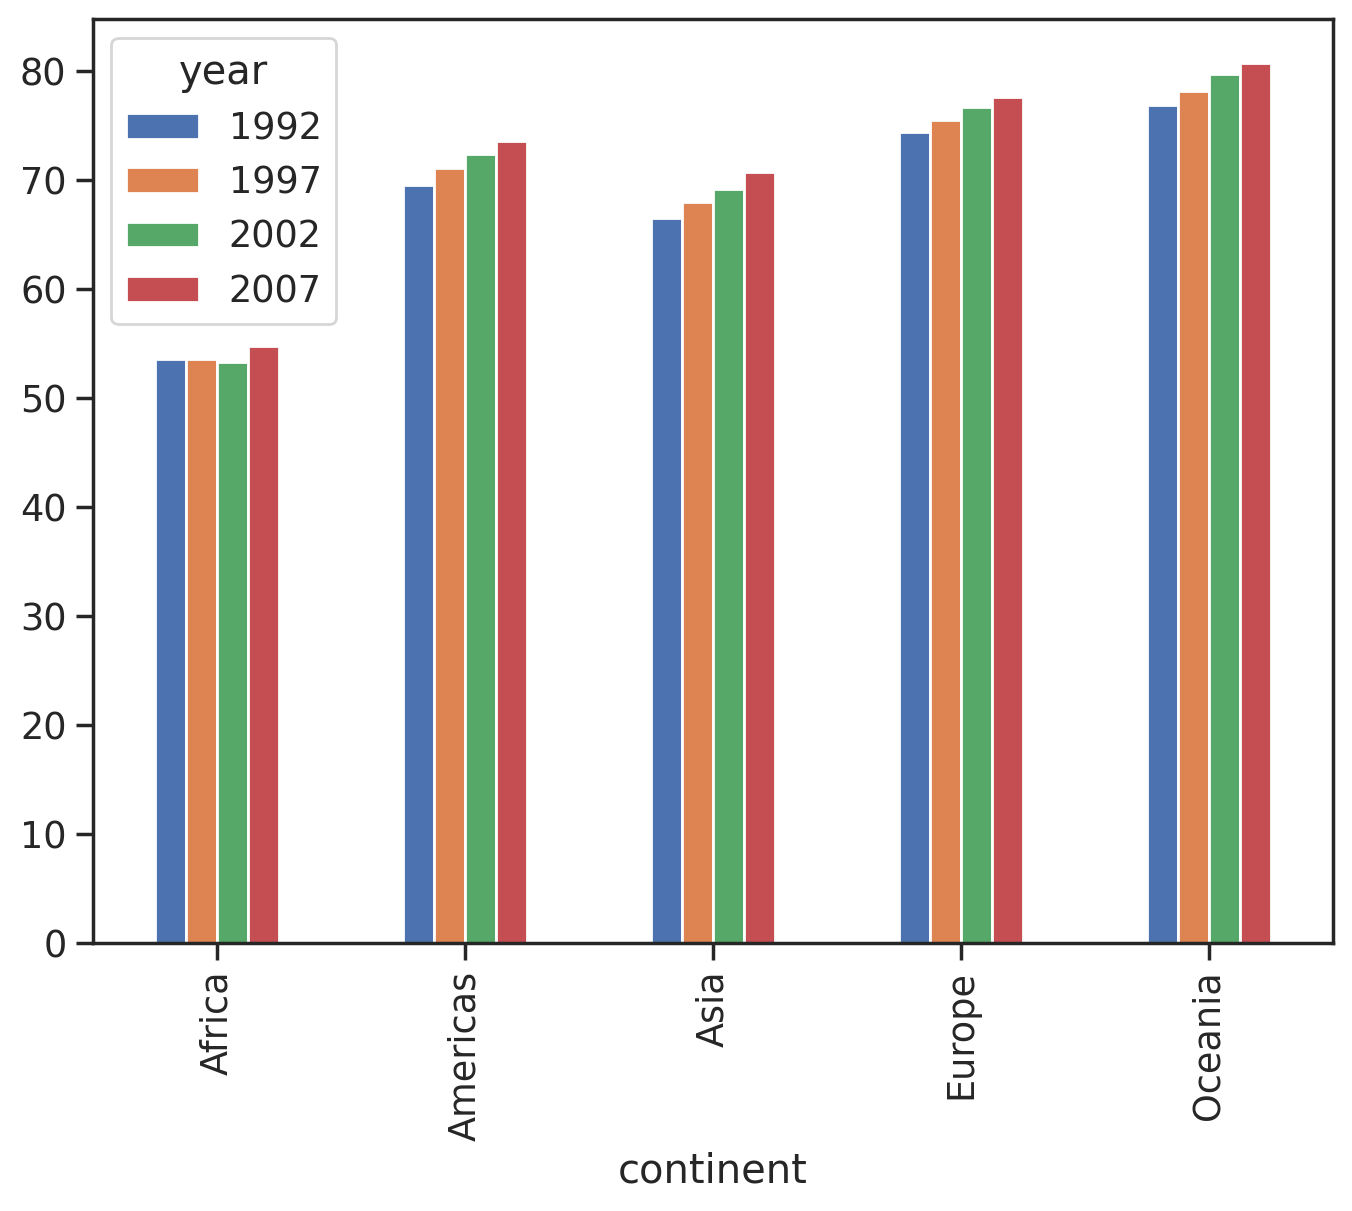

In [64]:
(gm_df
     .groupby(['continent', 'year'])
     ['lifeExp']
     .mean()
     .unstack('year')
     .loc[:, 1992:2007]
     .plot.bar()
);